In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
first_group_files=os.listdir("../data/results/test 1")
grid_files = [x for x in first_group_files if "grid" in x]
random_search_files = [x for x in first_group_files if x.find("random")!=-1]
first_group_files = [x for x in first_group_files if x.find("group")!=-1]
sec_and_third_group_files=os.listdir("../data/results/test 2")

In [3]:
grid_df=pd.DataFrame([])
for file_name in grid_files:
    df = pd.read_csv("../data/results/test 1/"+file_name, usecols = ['experiment_name',
                                                                     'mean_test_score',
                                         'params'])
    
    df['iter_num']=1
    df.loc[df['experiment_name']!='default params', 
           'iter_num'] = range(1, df.loc[df['experiment_name']!='default params'].shape[0]+1)
    
    grid_df = pd.concat([grid_df, df], sort=False)

In [4]:
def group_best_params_with_stop(df, group_num, stop_iter_num, group_size = 243):
    best_params = {}
    stop_iter_nums = {}
    best_score = {}

    tmp_df = df.loc[(df['iter_num'] > (group_num-1)*group_size) & \
                        (df['iter_num'] <= group_num*group_size)].copy() #take group
    
    for i in tmp_df.run_number.unique(): 
        tmp_df_i = tmp_df.loc[tmp_df.run_number==i] #take run
        #cut iterations:
        tmp_df_i_copy = tmp_df_i.copy()
        tmp_df_i_copy.loc[:, "mean_test_score"] = \
            tmp_df_i.loc[:, "mean_test_score"].cummax()      

        try:
            curr_max=tmp_df_i_copy.groupby("mean_test_score")["mean_test_score"]\
                .count().reset_index()
            max_score = curr_max.loc[curr_max["mean_test_score"]\
                                     >=stop_iter_num].index[0] 
                #get first interval with iter_amount more than stop_iter_num
        except:
            max_score = tmp_df_i_copy.mean_test_score.max()

        tmp_stop = tmp_df_i.loc[tmp_df_i["mean_test_score"]\
                                ==max_score].sort_values(by="iter_num").iloc[0]
            #get first element with best_score

        best_params[i] = tmp_stop['params']
        best_score[i] = max_score

        last_iter_num = tmp_stop['iter_num'] + stop_iter_num-1
        if (last_iter_num > group_num*group_size):
            last_iter_num = group_num*group_size

        stop_iter_nums[i] = last_iter_num - group_size*(group_num-1)
    return best_params, stop_iter_nums, best_score          

In [5]:
random_df = pd.DataFrame([])
for file_name in random_search_files:
    file_df = pd.read_csv("../data/results/test 1/" + file_name, 
                              usecols = ['experiment_name', 'mean_test_score',
                                         'params','run_number'])
    file_df['iter_num'] = range(1, file_df.shape[0]+1) 
    random_df = pd.concat([random_df, file_df], sort = False)

In [6]:
stop_iter_num = 100

sec_and_third_group_files = [x for x in sec_and_third_group_files \
                                 if x.find(str(stop_iter_num))!=-1]

In [7]:
best_params_full = {}
stop_iter_nums_full = {}
best_score_full = {}

In [8]:
def get_df_from_files(files_arr, group_num, group_size = 243):
    if group_num == 1:
        file_dir = "../data/results/test 1/"
    else:
        file_dir = "../data/results/test 2/"

    group_df = pd.DataFrame([])
    for file_name in files_arr:
        file_df = pd.read_csv(file_dir + file_name, 
                              usecols = ['mean_test_score',
                                         'params','run_number'])
        file_df['iter_num'] = range(1, file_df.shape[0]+1) 
        file_df['iter_num'] += (group_num-1)*group_size
        group_df = pd.concat([group_df, file_df], sort = False)
    return group_df
    

first_df = get_df_from_files(first_group_files, 1)
first_df = first_df.loc[first_df.iter_num<244]
best_params_full[1], stop_iter_nums_full[1], best_score_full[1] = \
            group_best_params_with_stop(first_df, 1, stop_iter_num)

gr_2_and_3_df = get_df_from_files(sec_and_third_group_files, 2)
best_params_full[2], stop_iter_nums_full[2], best_score_full[2] = \
            group_best_params_with_stop(gr_2_and_3_df, 2, stop_iter_num)
best_params_full[3], stop_iter_nums_full[3], best_score_full[3] = \
            group_best_params_with_stop(gr_2_and_3_df, 3, stop_iter_num)

In [9]:
full_df = pd.concat([first_df, gr_2_and_3_df], sort = False)

In [10]:
scores = np.array(list(best_score_full[3].values()), dtype = float)
print("MEAN best score:", np.mean(scores))
print("STD best score:", np.std(scores))

MEAN best score: 0.6674590799006869
STD best score: 0.0010305259879038954


In [11]:
best_params_full

{1: {8: "{'max_depth': 5, 'min_child_weight': 9}",
  3: "{'max_depth': 5, 'min_child_weight': 9}",
  1: "{'max_depth': 5, 'min_child_weight': 9}",
  9: "{'max_depth': 5, 'min_child_weight': 9}",
  7: "{'max_depth': 5, 'min_child_weight': 9}",
  10: "{'max_depth': 5, 'min_child_weight': 9}",
  5: "{'max_depth': 5, 'min_child_weight': 9}",
  4: "{'max_depth': 5, 'min_child_weight': 9}",
  2: "{'max_depth': 5, 'min_child_weight': 9}",
  6: "{'max_depth': 5, 'min_child_weight': 9}"},
 2: {5: "{'alpha': 0.12474489836055391, 'lambda': 0.012978253306978327}",
  10: "{'alpha': 0.48617912866394575, 'lambda': 0.5001369411003012}",
  8: "{'alpha': 0.7848690753328582, 'lambda': 0.5614150356069537}",
  3: "{'alpha': 0.9324358939404794, 'lambda': 0.5668554595955249}",
  9: "{'alpha': 0.48498789277245746, 'lambda': 0.032776563814494786}",
  2: "{'alpha': 0.6237297453340719, 'lambda': 0.6251026030301604}",
  6: "{'alpha': 0.33907644559974726, 'lambda': 0.09765767974465045}",
  4: "{'alpha': 0.09221902

In [12]:
stop_iter_nums_full # {group_num: {run_num : value, ...}, ...}

{1: {8: 102,
  3: 135,
  1: 118,
  9: 119,
  7: 230,
  10: 187,
  5: 121,
  4: 135,
  2: 225,
  6: 111},
 2: {5: 100,
  10: 100,
  8: 100,
  3: 100,
  9: 100,
  2: 100,
  6: 100,
  4: 100,
  7: 100,
  1: 100},
 3: {5: 243,
  10: 195,
  8: 228,
  3: 243,
  9: 238,
  2: 159,
  6: 232,
  4: 202,
  7: 243,
  1: 135}}

In [13]:
for group_num in stop_iter_nums_full:
    for run_num in stop_iter_nums_full[group_num]:
        stop_num = stop_iter_nums_full[group_num][run_num]
        full_df.loc[(full_df.run_number == run_num)&\
                    (full_df.iter_num > (group_num-1)*243)&\
                   (full_df.iter_num <= group_num*243)] = full_df.loc[(full_df.run_number == run_num)&\
                        (full_df.iter_num > (group_num-1)*243)&\
                        (full_df.iter_num <= (group_num-1)*243 + stop_num)]


In [14]:
full_df = full_df.dropna(how = 'all')

In [15]:
max_iters = []
for run_num in full_df.run_number.unique():
    max_iters.append(full_df.loc[full_df.run_number == run_num].shape[0])
    full_df.loc[full_df.run_number == run_num, 'iter_num'] = range(1, max_iters[-1]+1)
print("MEAN iters num:", np.mean(max_iters))
print("STD iters num:", np.std(max_iters))

MEAN iters num: 460.1
STD iters num: 52.29235125713893


In [16]:
max_iter = np.max(max_iters)

In [17]:
max_score_and_iter = full_df.groupby(by = 'run_number')['mean_test_score', 'iter_num'].max()

In [19]:
full_df = full_df.loc[:, ['mean_test_score', 'iter_num', 'run_number']]

In [20]:
for run_number in list(max_score_and_iter.loc[
        max_score_and_iter.iter_num < max_iter].index):
    new_part_df = pd.DataFrame([], columns=full_df.columns )
    new_part_df['iter_num']=range(int(max_score_and_iter.loc[run_number, 'iter_num']+1), 
                                  int(max_iter)+1)
    new_part_df['run_number'] = run_number
    new_part_df['mean_test_score'] = full_df.loc[full_df.run_number == run_number, 'mean_test_score'].max()
    full_df = pd.concat([full_df, new_part_df])
    full_df.loc[full_df.run_number == run_number, 'mean_test_score'] = \
        full_df.loc[full_df.run_number == run_number, 'mean_test_score'].cummax()
    
for run_number in list(max_score_and_iter.loc[
        max_score_and_iter.iter_num >= max_iter].index):
    full_df.loc[full_df.run_number == run_number, 'mean_test_score'] = \
        full_df.loc[full_df.run_number == run_number, 'mean_test_score'].cummax()

In [21]:
full_df['experiment_name']='group search'

In [22]:
## RANDOM_SEARCH
#get best scores per itration for each random_search performance:
random_df_stopped=pd.DataFrame([])
max_iters_for_RS = []
for i in random_df.run_number.unique():
    
    tmp=pd.DataFrame(random_df.loc[random_df.run_number==i, 
                                   "mean_test_score"].copy().cummax())
    tmp["iter_num"]=random_df.loc[random_df.run_number==i, "iter_num"]
    curr_max=tmp.groupby("mean_test_score").count().reset_index()
    max_score=curr_max.loc[curr_max["iter_num"]>=stop_iter_num, 
                           "mean_test_score"].values[0]
    
    tmp_before=tmp.loc[tmp["mean_test_score"]<max_score] #get steps before stop criterion
    tmp_stop=tmp.loc[tmp["mean_test_score"]==max_score].sort_values(by="iter_num")
    tmp_stop=tmp_stop.iloc[:stop_iter_num]
    df_stopped=pd.concat([tmp_before, tmp_stop], sort = False)  
    df_stopped['run_number']=i
    max_iters_for_RS.append(df_stopped.shape[0])
    random_df_stopped=pd.concat([random_df_stopped, df_stopped], sort=False)
    
    
print("MEAN iters num:", np.mean(max_iters_for_RS))
print("STD iters num:", np.std(max_iters_for_RS))

MEAN iters num: 195.0
STD iters num: 48.20165972246184


In [23]:
max_iter = np.max(max_iters_for_RS)
max_score_and_iter_RS = random_df_stopped.groupby(by = 'run_number')['mean_test_score', 'iter_num'].max()
for run_number in list(max_score_and_iter_RS.loc[
        max_score_and_iter_RS.iter_num < max_iter].index):
    new_part_df = pd.DataFrame([], columns=random_df_stopped.columns )
    new_part_df['iter_num']=range(int(max_score_and_iter_RS.loc[run_number, 'iter_num']+1), 
                                  int(max_iter)+1)
    new_part_df[['mean_test_score', 'run_number']] = max_score_and_iter_RS.loc[run_number, 'mean_test_score'], run_number
    random_df_stopped = pd.concat([random_df_stopped, new_part_df])
random_df_stopped['experiment_name']='random search'   

In [24]:
#get info for grid and deafault

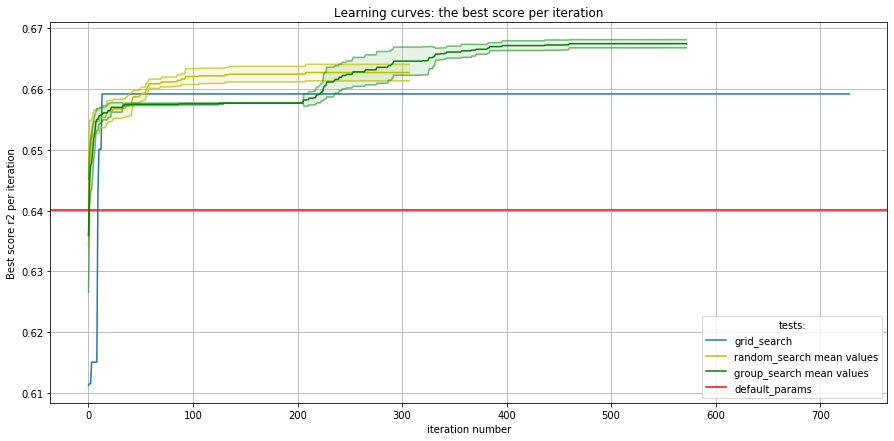

In [25]:
# Data with stop criterion
# stop if the cumulative score hasn't grown in "stop_iter_num" iterations
# GRID_SEARCH
#get best scores per itration for grid_search performance:
grid_perf=grid_df.loc[grid_df['experiment_name']!='default params',
                      'mean_test_score'].cummax()


## RANDOM_SEARCH
# get best scores per itration for each random_search performance:
# random_df_stopped
    
#get mean and confidence interval value for random_search performance on iteration:    

z = 1.96 # for 95% conf interval (coefficient)
# z = 1.64 # for 90% conf interval

n=random_df_stopped.shape[0]/random_df_stopped.iter_num.max() # now n=9, because 4 runs were made for random search
random_std=random_df_stopped.groupby(by="iter_num")['mean_test_score'].std() #std
random_std=(random_std*z)/np.sqrt(n) #confidence interval value 
random_mean=random_df_stopped.groupby(by="iter_num")['mean_test_score'].mean() #mean


## GROUP_SEARCH
#get best scores per itration for each group_search performance (same computations):

n=full_df.shape[0]/full_df.iter_num.max() # now n=10
group_std=full_df.groupby(by="iter_num")['mean_test_score'].std()
group_std=(group_std*z)/np.sqrt(n) 
group_std=group_std.fillna(0)
group_mean=full_df.groupby(by="iter_num")['mean_test_score'].mean()

## DEFAULT performance
default_perf=grid_df.loc[grid_df['experiment_name']=='default params', 'mean_test_score']


## PLOT
plt.figure(figsize=(15,7))
plt.grid()

#grid plot:
x=list(range(0, grid_perf.shape[0]))
plt.plot(x, grid_perf, label="grid_search")

#conf for random:
x=list(range(0, random_mean.shape[0]))
plt.plot(x, random_mean, color="y", label="random_search mean values")
lower_random=random_mean - random_std
upper_random=random_mean + random_std
plt.plot(x, lower_random, alpha=0.7, color="y")
plt.plot(x, upper_random, alpha=0.7, color="y")
plt.fill_between(x, lower_random, upper_random, alpha=0.1, color="y") 

#conf for group:
x=list(range(0, group_mean.shape[0]))
plt.plot(x, group_mean, color="green", label="group_search mean values")
lower_group=group_mean - group_std
upper_group=group_mean + group_std
plt.plot(x, lower_group, alpha=0.5, color="green")
plt.plot(x, upper_group, alpha=0.5, color="green")
plt.fill_between(x, lower_group, upper_group, alpha=0.1, color="green")

#line for default values
plt.axhline(default_perf.values, label="default_params", color='r')

plt.legend(title='tests:')
plt.title("Learning curves: the best score per iteration")
plt.ylabel("Best score r2 per iteration")
plt.xlabel("iteration number")
plt.savefig("../graphs/test 2/scores_with_stop_{}.jpg".format(stop_iter_num))
plt.show()

In [26]:
df = pd.concat([full_df, random_df_stopped], sort = False)

In [27]:
best_scores=df.groupby(by=['experiment_name', 
                           'run_number'])['mean_test_score'].max().reset_index()
#print("best scores:")
#print(best_scores)

best=pd.merge(df, best_scores, how='inner', 
              on=['experiment_name','run_number','mean_test_score']
             ).loc[:,['experiment_name','mean_test_score', 
                      'iter_num','run_number']]
#best step and params

In [28]:
print("MEAN:")
print(best_scores.groupby(by='experiment_name')['mean_test_score'].mean())
print("STD:")
print(best_scores.groupby(by='experiment_name')['mean_test_score'].std())

MEAN:
experiment_name
group search     0.667459
random search    0.662709
Name: mean_test_score, dtype: float64
STD:
experiment_name
group search     0.001086
random search    0.002200
Name: mean_test_score, dtype: float64
